# Data Visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Analizirati ću datoteku reqular_season_results.csv. Ovi podatci sadrže sve rezultate utakmica u svih 18 sezona (od sezone A do sezone R).

Opis podataka:
- `season` - identifikator sezone u kojoj je utakmica odigrana
- `daynum` - dan utakmice, integer raspona 0-132, offset od nultog dana sezone
- `wteam` - id ekipe koja je pobijedila
- `wscore` - broj bodova koje je osvojima pobjednička ekipa
- `lteam` - id ekipe koja je izgubila
- `lscore` - broj bodova koje je osvojila ekipa koja je izgubila
- `numot` - broj produžetaka u igri
- `wloc` - lokacija pobjedničke ekipe (jesu li gostujuća (A) ili domaća (H) ekipa)

In [20]:
results = pd.read_csv("march-machine-learning-mania-2015/regular_season_compact_results.csv", sep = ",")

## Tipovi podataka

In [21]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134566 entries, 0 to 134565
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   season  134566 non-null  int64 
 1   daynum  134566 non-null  int64 
 2   wteam   134566 non-null  int64 
 3   wscore  134566 non-null  int64 
 4   lteam   134566 non-null  int64 
 5   lscore  134566 non-null  int64 
 6   wloc    134566 non-null  object
 7   numot   134566 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 8.2+ MB


## Deskriptivna statistika podataka

In [22]:
results.describe()

,season,daynum,wteam,wscore,lteam,lscore,numot
count,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000
mean,2000.465140,75.573748,1286.570404,76.688614,1283.126169,64.562817,0.041638
std,8.680053,33.084248,104.564012,12.253340,104.976787,11.405004,0.239485
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1993.000000,47.000000,1197.000000,68.000000,1191.000000,57.000000,0.000000
50%,2001.000000,78.000000,1283.000000,76.000000,1281.000000,64.000000,0.000000
75%,2008.000000,103.000000,1379.000000,84.000000,1376.000000,72.000000,0.000000
max,2014.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


## Nedostajuće vrijednosti

In [23]:
results.isna().sum()

season    0
daynum    0
wteam     0
wscore    0
lteam     0
lscore    0
wloc      0
numot     0
dtype: int64

Nema nedostajajućih podataka. Da ima, broj bi bio veći od 0.

## Stršeće vrijednosti

In [24]:
results.describe()

,season,daynum,wteam,wscore,lteam,lscore,numot
count,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000,134566.000000
mean,2000.465140,75.573748,1286.570404,76.688614,1283.126169,64.562817,0.041638
std,8.680053,33.084248,104.564012,12.253340,104.976787,11.405004,0.239485
min,1985.000000,0.000000,1101.000000,34.000000,1101.000000,20.000000,0.000000
25%,1993.000000,47.000000,1197.000000,68.000000,1191.000000,57.000000,0.000000
50%,2001.000000,78.000000,1283.000000,76.000000,1281.000000,64.000000,0.000000
75%,2008.000000,103.000000,1379.000000,84.000000,1376.000000,72.000000,0.000000
max,2014.000000,132.000000,1464.000000,186.000000,1464.000000,150.000000,6.000000


`numot` ima neke stršeće podatke. Prosjek je 0.041638 dok je maksimum 6.000. Dolje su prikazane utakmice koje su imale više of 5 produžetaka (5 od ukupno 91224 utakmica).

In [25]:
results[results.numot >= 5]

,season,daynum,wteam,wscore,lteam,lscore,wloc,numot
86161,2005,90,1198,118,1114,114,H,5
93199,2007,22,1236,97,1442,95,A,5
100582,2008,79,1124,116,1401,110,A,5
108044,2009,129,1393,127,1163,117,N,6
127714,2013,96,1323,104,1257,101,H,5


## Graf 1: Broj pobjeda kod kuće (H) i vani (A)

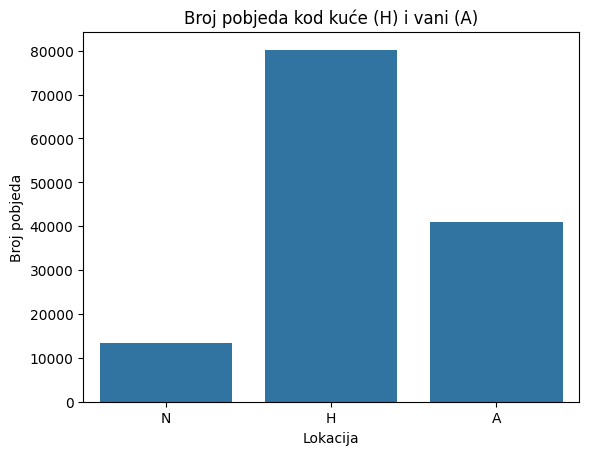

In [26]:
sns.countplot(x='wloc', data=results)
plt.title('Broj pobjeda kod kuće (H) i vani (A)')
plt.xlabel('Lokacija')
plt.ylabel('Broj pobjeda')
plt.show()

## Graf 2: Broj produžetaka u igri

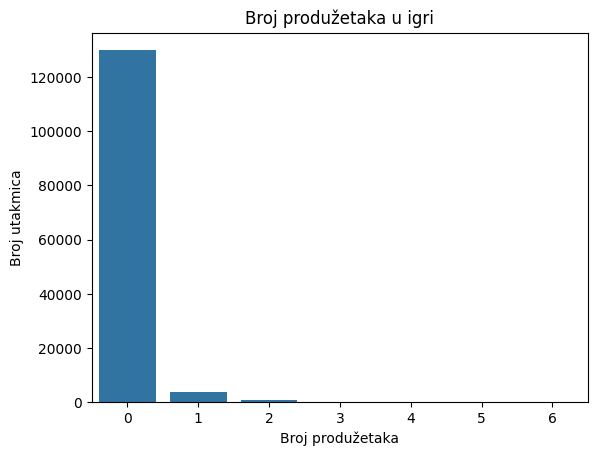

In [27]:
sns.countplot(x='numot', data=results)
plt.title('Broj produžetaka u igri')
plt.xlabel('Broj produžetaka')
plt.ylabel('Broj utakmica')
plt.show()

## Graf 3: Raspršenost broja bodova osvojenih pobjedničkom ekipom

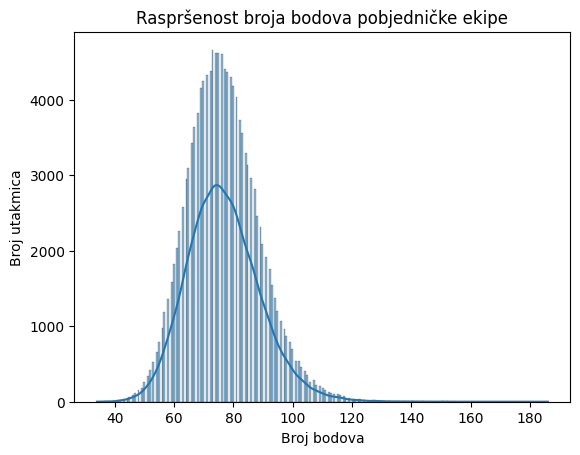

In [14]:
sns.histplot(results['wscore'], kde=True)
plt.title('Raspršenost broja bodova pobjedničke ekipe')
plt.xlabel('Broj bodova')
plt.ylabel('Broj utakmica')
plt.show()

## Graf 4: Raspršenost broja bodova osvojenih gubitničkom ekipom

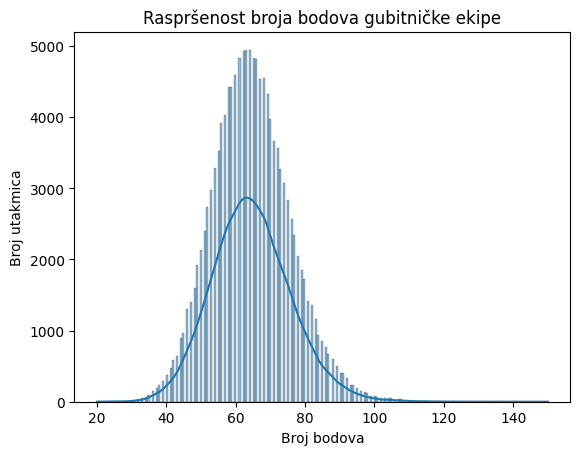

In [15]:
sns.histplot(results['lscore'], kde=True)
plt.title('Raspršenost broja bodova gubitničke ekipe')
plt.xlabel('Broj bodova')
plt.ylabel('Broj utakmica')
plt.show()


## Graf 5: Raspršenost broja bodova pobjedničke ekipe prema danu utakmice

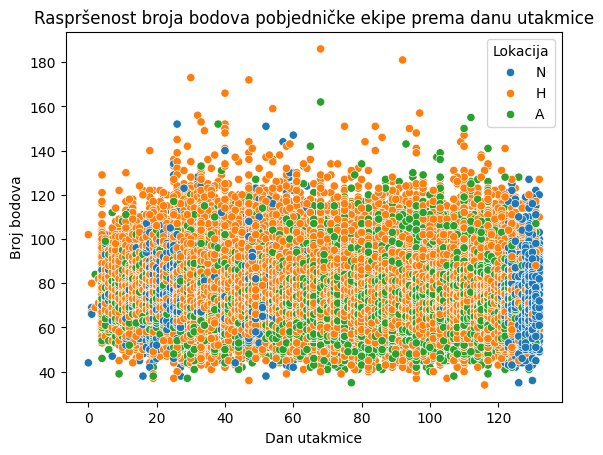

In [29]:
sns.scatterplot(x='daynum', y='wscore', data=results, hue='wloc')
plt.title('Raspršenost broja bodova pobjedničke ekipe prema danu utakmice')
plt.xlabel('Dan utakmice')
plt.ylabel('Broj bodova')
plt.legend(title='Lokacija')
plt.show()


## Graf 6: Box plot broja bodova pobjedničke ekipe prema lokaciji (domaći teren ili gostujući)

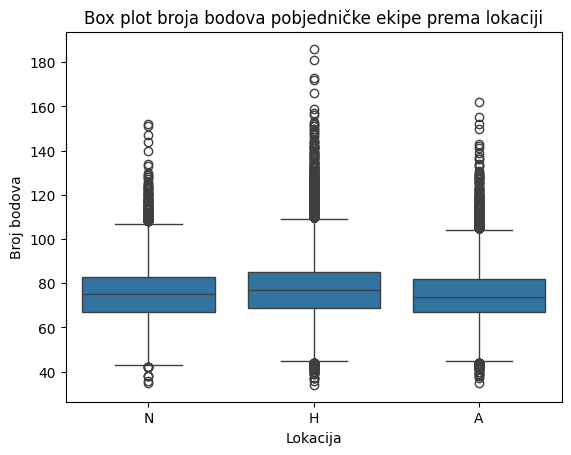

In [36]:
sns.boxplot(x='wloc', y='wscore', data=results)
plt.title('Box plot broja bodova pobjedničke ekipe prema lokaciji')
plt.xlabel('Lokacija')
plt.ylabel('Broj bodova')
plt.show()


## Graf 7: Heatmap korelacije među numeričkim varijablama

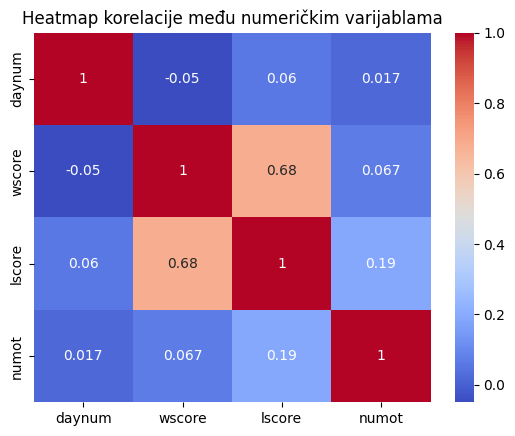

In [34]:

correlation_matrix = results[['daynum', 'wscore', 'lscore', 'numot']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap korelacije među numeričkim varijablama')
plt.show()